<a href="https://colab.research.google.com/github/jarinari/Algorithmic-Trading-Plugins/blob/master/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

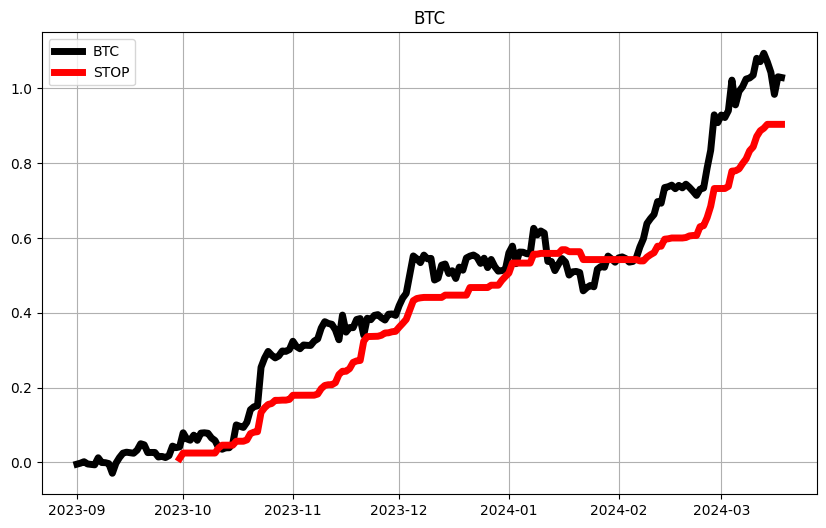

In [ ]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

start_date = datetime.datetime.today() - datetime.timedelta(days=1*200)
btc = yf.download('BTC-USD', start=start_date, end=datetime.datetime.today(), progress=False)[['Close']]
btc = btc.pct_change()
btc = btc.dropna()

lower_band = btc['Close'].cumsum().rolling(window=30).min()
upper_band = btc['Close'].cumsum().rolling(window=30).max()

plt.figure(figsize=(10, 6))
plt.plot(btc.cumsum(), color='black', linewidth=5, label='BTC')
plt.plot((upper_band+lower_band)/2, color='red', linewidth=5, label='STOP')
plt.grid(True)
title = 'BTC'
plt.title(title)
plt.legend()
plt.show()